## Obesity Dataset:

- The data consist of the estimation of **obesity levels** in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining **17 attributes and 2111 records**.

- **The attributes related with eating habits are:**
1. Frequent consumption of high caloric food (FAVC).
2. Frequency of consumption of vegetables (FCVC).
3. Number of main meals (NCP).
4. Consumption of food between meals (CAEC)
5. Consumption of water daily (CH20)
6. Consumption of alcohol (CALC).

- **The attributes related with the physical condition are:**
1. Calories consumption monitoring (SCC)
2. Physical activity frequency (FAF)
3. Time using technology devices (TUE)
4. Transportation used (MTRANS)

|  Column  |             Meaning       |
|----------|---------------------------|
|  Gender  |      Gender (1=Female or 0=Male)       |
|  Age  |         ages between 14 and 61        |
|  Height  |             Height       |
|  Weight  |             Weight       |
|  family_history_with_overweight  |             family member suffered or suffers from overweight (1=Yes, 0=No)    |
|  FAVC  |              Frequent consumption of high caloric food (0=Yes, 1=No)       |
|  FCVC  |            Frequency of consumption of vegetables (1, 2, or 3)      |
|  NCP  |             Number of main meals (1, 2, 3, or 4)      |
|  CAEC  |          Consumption of food between meals (1=No, 2=Sometimes, 3=Frequently, 4=Always)      |
|  SMOKE  |         Smoker or not (0=Yes, 1=No)      |
|  CH2O  |        Consumption of water daily       |
|  SCC  |         Calories consumption monitoring (0=Yes, 1=No)      |
|  FAF  |         Physical activity frequency (0, 1, 2, or 3)       |
|  TUE  |        Time using technology devices (0, 1, or 2)      |
|  CALC  |       Consumption of alcohol (1=No, 2=Sometimes, 3=Frequently or 4=Always)      |
|  MTRANS  |          Transportation used (automobile, motorbike, bike, public transportation, or walking)     |
|  NObeyesdad  |             Obesity level deducted (1=Insufficient Weight, 2=Normal Weight, 3=Overweight Level I, 4=Overweight Level II, 5=Obesity Type I, 6=Obesity Type_II, 7=Obesity Type III)    |

**Data Label**

- NObesity values are:

• Underweight Less than 18.5                                        
• Normal 18.5 to 24.9                                      
• Overweight 25.0 to 29.9                                      
• Obesity I 30.0 to 34.9                                          
• Obesity II 35.0 to 39.9                                        
• Obesity III Higher than 40

## Import Libraries:

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.3 MB/s eta 0:00:00


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go

from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

## Read Data:

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
train.shape

(20758, 18)

In [ ]:
test.shape

(13840, 17)

In [ ]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
for i in train.columns:
    print(
        i,': Null Count is',train[i].isnull().sum(),
          '\n',train[i].unique(),
          '\n','*'*50
    )

id : Null Count is 0 
 [    0     1     2 ... 20755 20756 20757] 
 **************************************************
Gender : Null Count is 0 
 ['Male' 'Female'] 
 **************************************************
Age : Null Count is 0 
 [24.443011 18.       20.952737 ... 25.746113 38.08886  33.852953] 
 **************************************************
Height : Null Count is 0 
 [1.699998 1.56     1.71146  ... 1.791366 1.672594 1.536819] 
 **************************************************
Weight : Null Count is 0 
 [ 81.66995   57.        50.165754 ... 152.063947  79.5       80.615325] 
 **************************************************
family_history_with_overweight : Null Count is 0 
 ['yes' 'no'] 
 **************************************************
FAVC : Null Count is 0 
 ['yes' 'no'] 
 **************************************************
FCVC : Null Count is 0 
 [2.         1.880534   3.         2.679664   2.919751   1.99124
 1.397468   2.636719   1.         1.392665   2.20396

**Note:**
- We have columns that should be **categorical** but the values in it are **continous**, so we will **round** it like:
1. **Age:** should be int.
2. **Height, Weight and CH2O:** round to closest to 2 numbers.
3. **FCVC, NCP, TUE and FAF:** should round to int.

**Check Datatype**

In [ ]:
train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

- Datatypes are correct.

**Check for null values**

In [ ]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- There is missing in data.

**Check for range of data**

In [ ]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


- All values in the correct range.

**Check for uniqueness**

In [ ]:
train.drop(columns='id', axis=1, inplace=True)

In [ ]:
train.duplicated().sum()

0

- There is no duplication in data.

- **Numerical Columns:** Age, Height, Weight.
- **Categorical Columns:** The rest.

**Categorical Columns**

In [ ]:
train['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

- We have **7 categories** in the **label**.

**Split training data into train and validation**

In [5]:
train_data, test_data = train_test_split(train, test_size=.2, random_state=42)

In [6]:
print(train_data.shape)
print(test_data.shape)

(16606, 18)
(4152, 18)


## EDA:

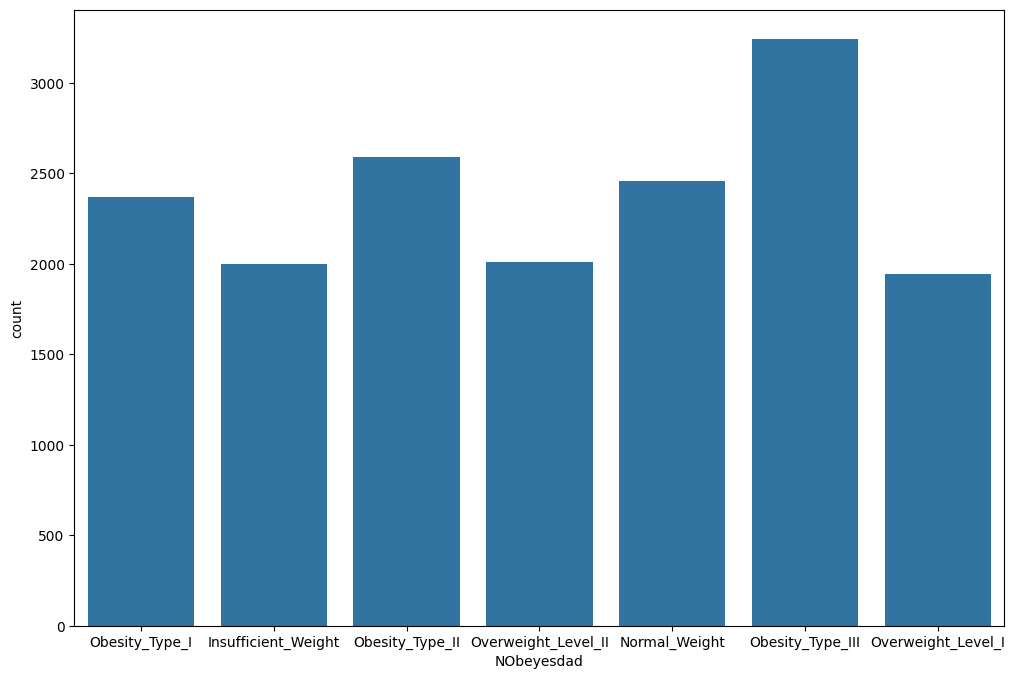

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='NObeyesdad');

- **Note:** There is imbalance between classes in target column.

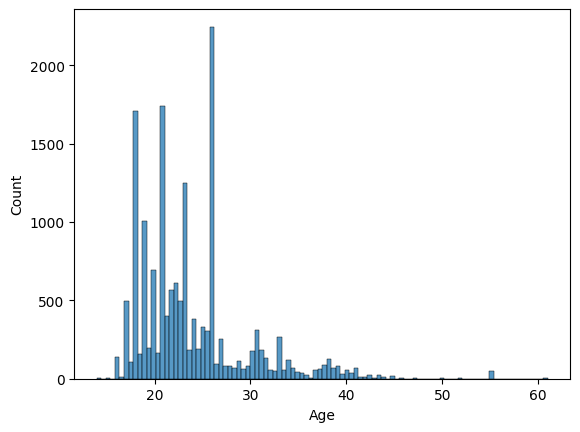

In [ ]:
sns.histplot(data=train_data, x='Age');

- There is **skewness** in age **column**


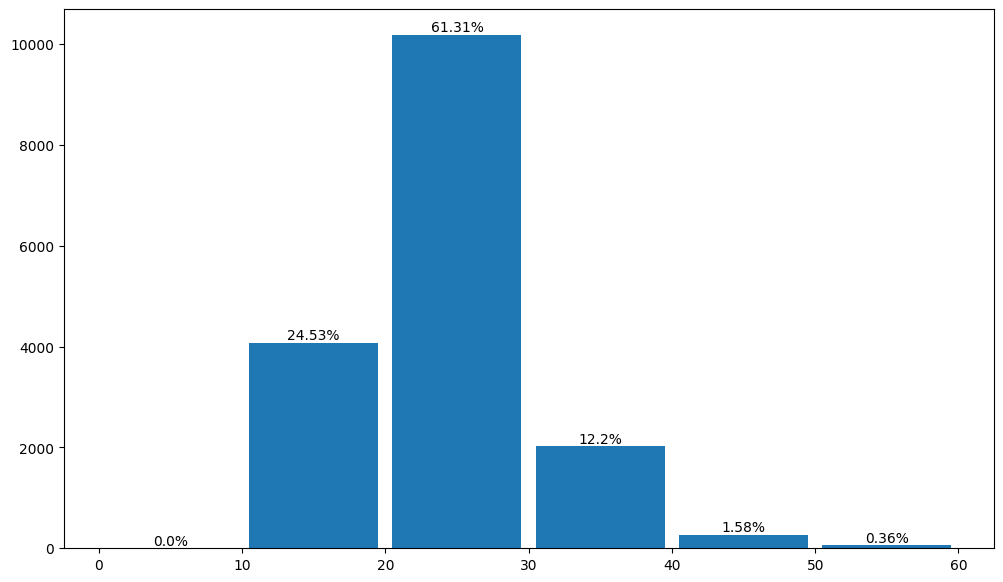

In [ ]:
plt.figure(figsize=(12, 7))

freq, bins, patches = plt.hist(train_data['Age'], bins=[0, 10, 20, 30, 40, 50, 60], rwidth=.9)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / train_data.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 10, 20, 30, 40, 50, 60]);

- Nearly **61%** of people in the data have age from 20 to 30 (young).

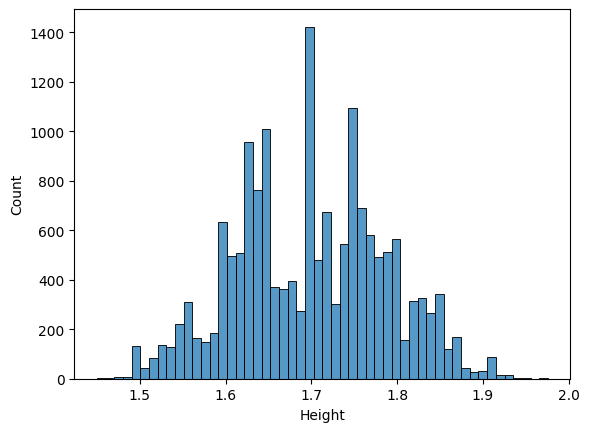

In [ ]:
sns.histplot(data=train_data, x='Height');

- **Height** is approximately normal distribution.

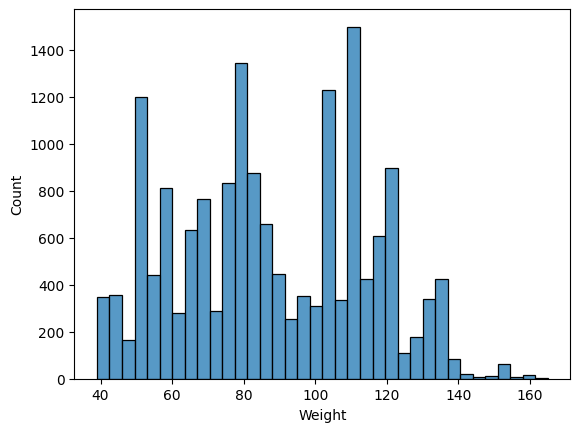

In [ ]:
sns.histplot(data=train_data, x='Weight');

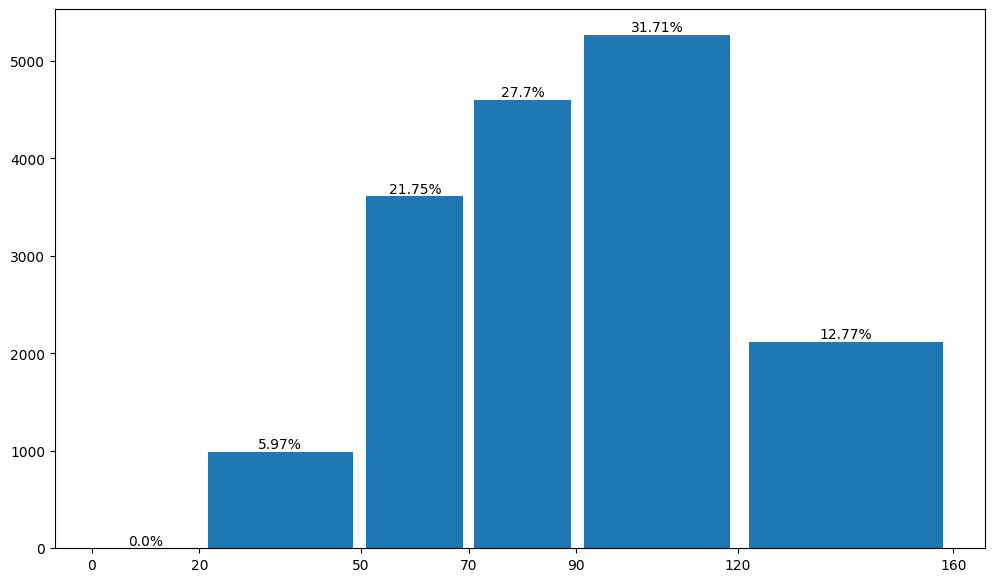

In [ ]:
plt.figure(figsize=(12, 7))

freq, bins, patches = plt.hist(train_data['Weight'], bins=[0, 20, 50, 70, 90, 120, 160], rwidth=.9)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / train_data.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 20, 50, 70, 90, 120, 160]);

- There is skewness in weight column.
- Nearly 31% of people in dataset have weight from 90 to 120

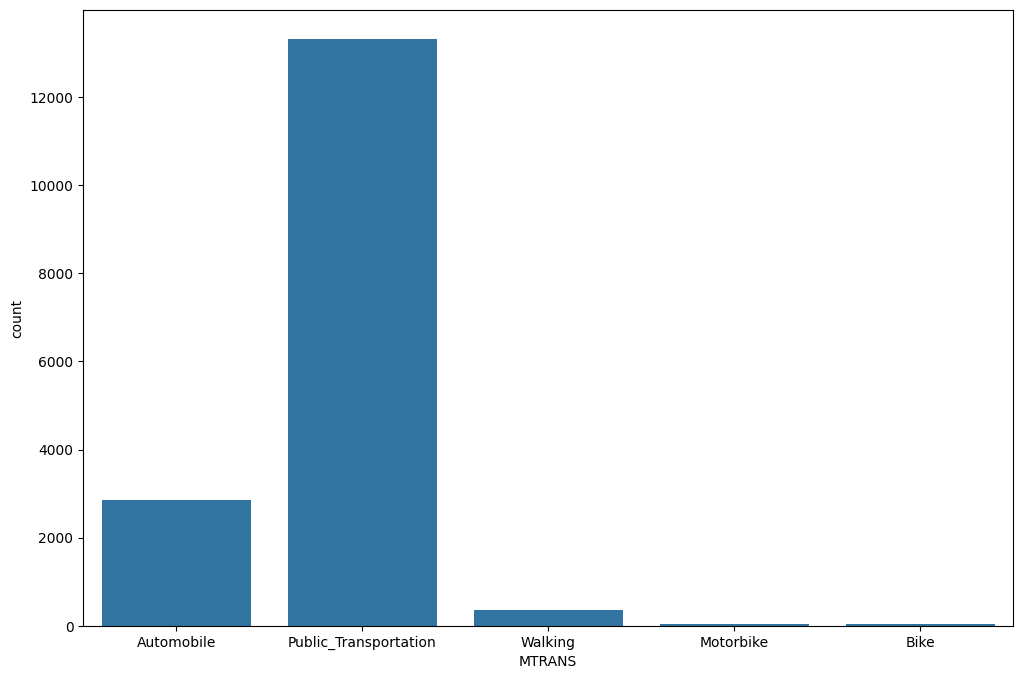

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='MTRANS');

- The **most** used one is **Public Transportation** and the **least** one is **Bike**.

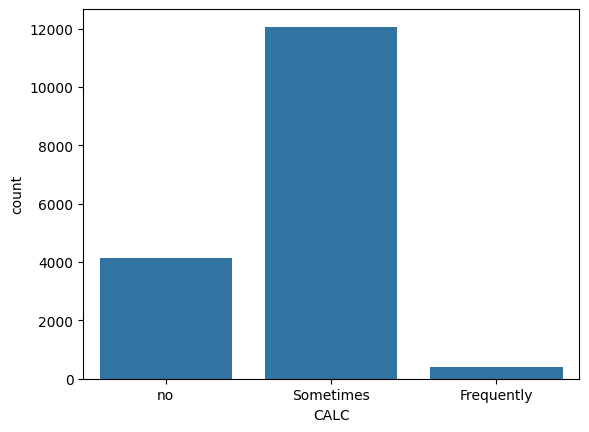

In [ ]:
sns.countplot(data=train_data, x='CALC');

- **Note:** The **most** of people is **sometimes** using alcohol and the **least** ones who is using **frequantly**.

#### What is the range of ages in each category in the target

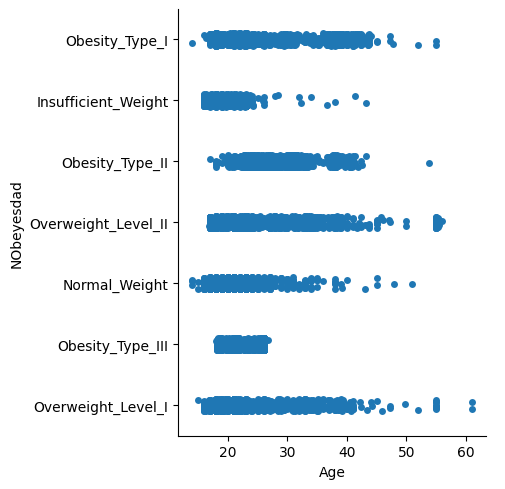

In [ ]:
sns.catplot(data=train_data, x='Age', y='NObeyesdad');

- **Insufficient Weight** and **Obesity Type |||** appear nearly for ages from 18 to 30.

#### What is the relation between weight and target


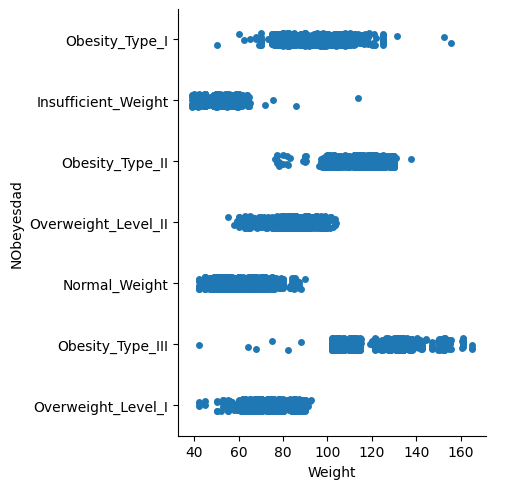

In [ ]:
sns.catplot(data=train_data, x='Weight', y='NObeyesdad');

- Insufficient weight have low weights from 40 to 80.
- Obesity Type | have high weights from 70 to 130
- Obesity Type || have higher weights from 80 to 140
- Obesity Type ||| have higher weights from 100 to 170

#### What is the relation between height and target

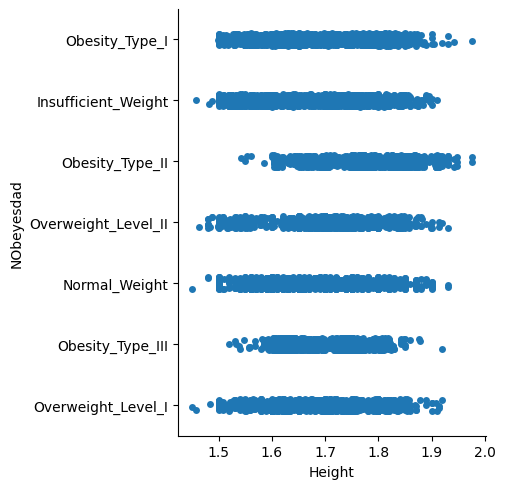

In [ ]:
sns.catplot(data=train_data, x='Height', y='NObeyesdad');

- Here almost Heights have all categories.



#### How many people in each cluster of weight drink ?

In [ ]:
pivot_mean_df = pd.pivot_table(train_data, values='CH2O', index='NObeyesdad', aggfunc='mean')
pivot_mean_df = pivot_mean_df.reset_index()

In [ ]:
fig = px.bar(pivot_mean_df, x='NObeyesdad', y='CH2O', title='Mean of drinking water by Obesity Type')
fig.show()

- The largest Mean of CH2O that people drinks is about 2 and this for Obesity Type |||
- The smallest Mean of CH2O that people drinks is about 1.7 and this for Insufficient Weight.

#### What is the highest calorie consumption class?

In [ ]:
grouped_counts = train_data.groupby(['NObeyesdad', 'FAVC']).size().reset_index(name='counts')

In [ ]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='FAVC', title='Count of FAVC (Yes/No) in Each Weight Group')
fig.show()

- **Obesity Type |||** have the most calories.

#### What is the mean to eat NCP for each cluster ?

In [ ]:
pivot_mean_df = pd.pivot_table(train_data, values='NCP', index='NObeyesdad', aggfunc='mean')
pivot_mean_df = pivot_mean_df.reset_index()

In [ ]:
fig = px.bar(pivot_mean_df, x='NObeyesdad', y='NCP', title='Mean of eating meal in day by Obesity Type')
fig.show()

- The most number of meals is in Obesity Type |||

#### What is the height cluster smoking?

In [ ]:
grouped_counts = train_data.groupby(['NObeyesdad', 'SMOKE']).size().reset_index(name='counts')

In [ ]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='SMOKE', title='Count of SMOKE (Yes/No) in Each NObeyesdad type')
fig.show()

- The most people that smokes are in Obesity Type ||

#### What is the most cluster not enough eating the main meal?

In [ ]:
grouped_counts = train_data.groupby(['NObeyesdad', 'CAEC']).size().reset_index(name='counts')

In [ ]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='CAEC', title='Count of CAEC (Yes/No) in Each Weight Group')
fig.show()

- the most cluster not enough eating between the main meal is in Overweight Level |.

#### What is the most class Consumption of alcohol?

In [ ]:
grouped_counts = train_data.groupby(['NObeyesdad', 'CALC']).size().reset_index(name='counts')

In [ ]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='CALC', title='Count of CALC (Yes/No) in Each Weight Group')
fig.show()

- The most class Consumption of alcohol is in Overweight Level ||.

#### What is the Transportation that people prefer to use and why?

In [ ]:
grouped_counts = train_data.groupby(['NObeyesdad', 'MTRANS']).size().reset_index(name='counts')

In [ ]:
fig = px.bar(grouped_counts, x='NObeyesdad', y='counts', color='MTRANS',
             title='Count of people prefre to use in Each Weight Group')
fig.show()

- Most of people prefer to use Public Transportation and They are from Obesity Type |||

#### What is the mean of the time that each cluster do TUE?

In [ ]:
pivot_mean_df = pd.pivot_table(train_data, values='TUE', index='NObeyesdad', aggfunc='mean')
pivot_mean_df = pivot_mean_df.reset_index()

In [ ]:
fig = px.bar(pivot_mean_df, x='NObeyesdad', y='TUE', title='Mean of time using technology in day by group age')
fig.show()

- The most people that use Technology in Type of Sufficient Weight.

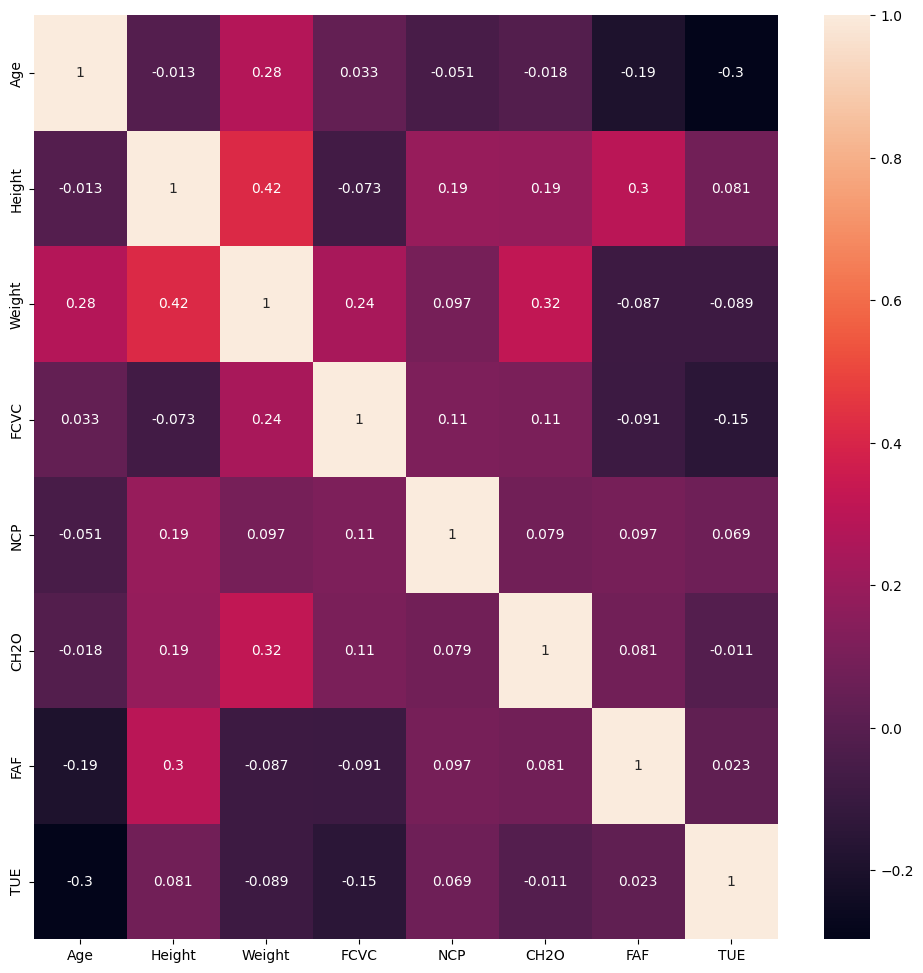

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_data.corr(), annot=True);

- There is **no strong correlation** between 2 columns and this is good for model to learn variability in data.

In [ ]:
train_data.sample()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
18741,Male,38.895069,1.7,79.843221,yes,yes,3.0,2.938135,Sometimes,no,1.718569,no,2.834373,0.0,Sometimes,Automobile,Overweight_Level_II


- Distribution of Numerical Values and do bins and make conclusion from it.
- Categories for each categorical column.

## Note:
- Here We have done preprocessing and models using steps.
- Finally We have used **Pipeline** contains the final sequance.

## Data Preparation:

**Correct columns values**

In [7]:
train_data['Age'] = train_data['Age'].astype(int)
train_data[['Height', 'Weight', 'CH2O']] = train_data[['Height', 'Weight', 'CH2O']].round(2)
train_data[['FCVC', 'NCP', 'TUE', 'FAF']] = train_data[['FCVC', 'NCP', 'TUE', 'FAF']].round().astype(int)

**Split Data into X and y**

In [8]:
X = train_data.drop(columns='NObeyesdad', axis=1)
y = train_data['NObeyesdad']

In [9]:
print(X.shape)
print(y.shape)

(16606, 17)
(16606,)


**Encode String to Numerical**

- Features

In [10]:
categorical = X[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']]

In [11]:
categorical.shape

(16606, 8)

In [13]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [14]:
encoder.fit(categorical)

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [15]:
X[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']] = encoder.transform(X[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']])

- Target

In [16]:
target_encoder = LabelEncoder()
target_encoder.fit(y)

LabelEncoder()

In [17]:
target = target_encoder.transform(y)

In [18]:
y = target

In [19]:
y

array([2, 0, 3, ..., 5, 4, 2])

**Outliers**

In [20]:
scaler = StandardScaler()

In [21]:
X[['Age', 'Height', 'Weight']] = scaler.fit_transform(X[['Age', 'Height', 'Weight']])

In [22]:
X.sample()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
13401,13401,0.0,-0.81128,-0.916118,-1.137972,1.0,1.0,3,3,2.0,0.0,1.0,0.0,2,1,1.0,3.0


**SMOTE**

In [23]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

## Test Data

In [24]:
test.drop(columns='id', inplace=True)

In [25]:
test[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']] = encoder.transform(test[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']])

In [26]:
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1.0,26.899886,1.848294,120.644178,1.0,1.0,2.938616,3.000000,2.0,0.0,2.825629,0.0,0.855400,0.000000,1.0,3.0
1,0.0,21.000000,1.600000,66.000000,1.0,1.0,2.000000,1.000000,2.0,0.0,3.000000,0.0,1.000000,0.000000,1.0,3.0
2,0.0,26.000000,1.643355,111.600553,1.0,1.0,3.000000,3.000000,2.0,0.0,2.621877,0.0,0.000000,0.250502,1.0,3.0
3,1.0,20.979254,1.553127,103.669116,1.0,1.0,2.000000,2.977909,2.0,0.0,2.786417,0.0,0.094851,0.000000,1.0,3.0
4,0.0,26.000000,1.627396,104.835346,1.0,1.0,3.000000,3.000000,2.0,0.0,2.653531,0.0,0.000000,0.741069,1.0,3.0


## Split data into train and test:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [28]:
def model_prediction(model):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print(f'Training accuracy: {train_accuracy}')
    print("train Classification Report:")
    print(classification_report(y_train, y_pred_train))
    print("**************************************************************************")
    print(f'Testing accuracy: {test_accuracy}')
    print("Test Classification Report:")
    print(classification_report(y_test, y_pred_test))

## SVC Model:

In [71]:
svc = SVC()

In [72]:
svc.fit(X_train, y_train)

SVC()

**Training**

In [73]:
y_pred_train = svc.predict(X_train)

<Axes: >

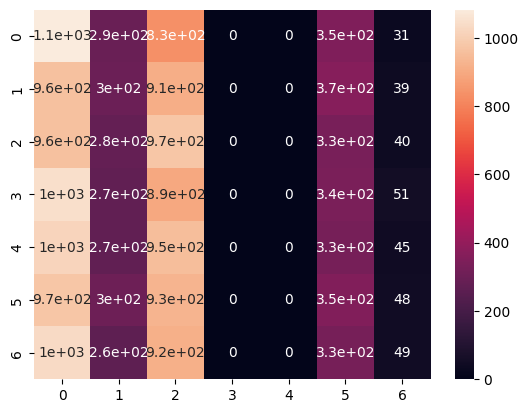

In [74]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [75]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.15      0.42      0.22      2587
           1       0.15      0.12      0.13      2580
           2       0.15      0.38      0.22      2585
           3       0.00      0.00      0.00      2600
           4       0.00      0.00      0.00      2614
           5       0.15      0.14      0.14      2604
           6       0.16      0.02      0.03      2585

    accuracy                           0.15     18155
   macro avg       0.11      0.15      0.11     18155
weighted avg       0.11      0.15      0.11     18155



**Testing**

In [76]:
y_pred_test = svc.predict(X_test)

<Axes: >

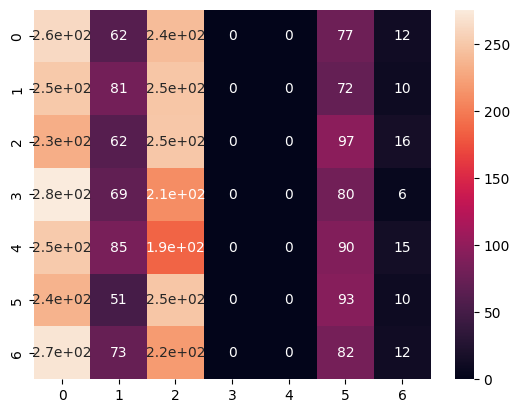

In [77]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [78]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.15      0.40      0.22       655
           1       0.17      0.12      0.14       662
           2       0.16      0.38      0.22       657
           3       0.00      0.00      0.00       642
           4       0.00      0.00      0.00       628
           5       0.16      0.15      0.15       638
           6       0.15      0.02      0.03       657

    accuracy                           0.15      4539
   macro avg       0.11      0.15      0.11      4539
weighted avg       0.11      0.15      0.11      4539



## Hyperparameter Tuning:

In [79]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [80]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.score(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
pred = grid.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

## Decision Tree Model:

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Training**

In [ ]:
y_pred_train = dt.predict(X_train)

<AxesSubplot:>

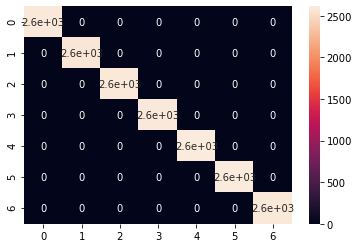

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       1.00      1.00      1.00      2580
           2       1.00      1.00      1.00      2585
           3       1.00      1.00      1.00      2600
           4       1.00      1.00      1.00      2614
           5       1.00      1.00      1.00      2604
           6       1.00      1.00      1.00      2585

    accuracy                           1.00     18155
   macro avg       1.00      1.00      1.00     18155
weighted avg       1.00      1.00      1.00     18155



**Testing**

In [ ]:
y_pred_test = dt.predict(X_test)

<AxesSubplot:>

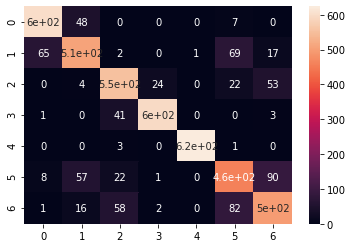

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       655
           1       0.80      0.77      0.78       662
           2       0.81      0.84      0.83       657
           3       0.96      0.93      0.94       642
           4       1.00      0.99      1.00       628
           5       0.72      0.72      0.72       638
           6       0.75      0.76      0.76       657

    accuracy                           0.85      4539
   macro avg       0.85      0.85      0.85      4539
weighted avg       0.85      0.85      0.85      4539



In [ ]:
print(dt.max_features)
print(dt.max_depth)
print(dt.min_samples_split)
print(dt.min_samples_leaf)

None
None
2
1


## Hyperparameter Tuning:

In [ ]:
max_features = ['auto', 'sqrt']
max_depth = [2, 8, 12, 25, 30]
min_samples_split = [2, 5]
min_samples_leaf = [3, 5]

In [ ]:
param_grid = {
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(dt_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, 12, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 5]})

In [ ]:
grid.score(X_train, y_train)

0.9052602588818507

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=25, max_features='auto', min_samples_leaf=3,
                       min_samples_split=5)

In [ ]:
grid.best_score_

0.8367389958859723

In [ ]:
grid.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [ ]:
pred = grid.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.811191892487332

In [ ]:
precision_score(y_test, pred, average='weighted')

0.8116676840957849

In [ ]:
recall_score(y_test, pred, average='weighted')

0.811191892487332

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       655
           1       0.70      0.72      0.71       662
           2       0.80      0.82      0.81       657
           3       0.96      0.94      0.95       642
           4       0.99      0.99      0.99       628
           5       0.68      0.67      0.68       638
           6       0.74      0.70      0.72       657

    accuracy                           0.81      4539
   macro avg       0.81      0.81      0.81      4539
weighted avg       0.81      0.81      0.81      4539



**Focus on values that get best score**

In [ ]:
max_features = ['auto', 'sqrt']
max_depth = [25, 30, 32, 35]
min_samples_split = [4, 5, 7]
min_samples_leaf = [3, 5, 7]

In [ ]:
param_grid = {
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(dt_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [25, 30, 32, 35],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [4, 5, 7]})

In [ ]:
grid.score(X_train, y_train)

0.921894794822363

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=7)

In [ ]:
grid.best_score_

0.8401556413150326

In [ ]:
grid.best_params_

{'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [ ]:
pred = grid.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8567966512447676

In [ ]:
precision_score(y_test, pred, average='weighted')

0.8568430596087265

In [ ]:
recall_score(y_test, pred, average='weighted')

0.8567966512447676

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       655
           1       0.77      0.81      0.79       662
           2       0.83      0.85      0.84       657
           3       0.95      0.94      0.94       642
           4       1.00      1.00      1.00       628
           5       0.75      0.73      0.74       638
           6       0.80      0.76      0.78       657

    accuracy                           0.86      4539
   macro avg       0.86      0.86      0.86      4539
weighted avg       0.86      0.86      0.86      4539



## Random Forest Model:

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

**Training**

In [ ]:
y_pred_train = rf.predict(X_train)

<AxesSubplot:>

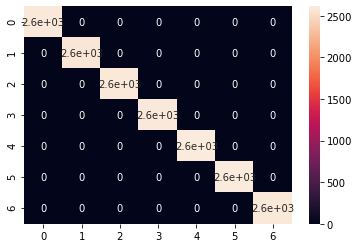

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       1.00      1.00      1.00      2580
           2       1.00      1.00      1.00      2585
           3       1.00      1.00      1.00      2600
           4       1.00      1.00      1.00      2614
           5       1.00      1.00      1.00      2604
           6       1.00      1.00      1.00      2585

    accuracy                           1.00     18155
   macro avg       1.00      1.00      1.00     18155
weighted avg       1.00      1.00      1.00     18155



**Testing**

In [ ]:
y_pred_test = rf.predict(X_test)

<AxesSubplot:>

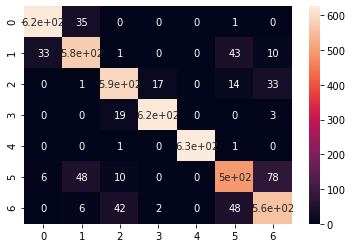

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       655
           1       0.86      0.87      0.87       662
           2       0.89      0.90      0.90       657
           3       0.97      0.97      0.97       642
           4       1.00      1.00      1.00       628
           5       0.82      0.78      0.80       638
           6       0.82      0.85      0.83       657

    accuracy                           0.90      4539
   macro avg       0.90      0.90      0.90      4539
weighted avg       0.90      0.90      0.90      4539



In [ ]:
print(rf.n_estimators)
print(rf.max_features)
print(rf.max_depth)
print(rf.min_samples_split)
print(rf.min_samples_leaf)
print(rf.bootstrap)

100
auto
None
2
1
True


## Hyperparameter Tuning:

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 8, 12, 25, 30]
min_samples_split = [2, 5]
min_samples_leaf = [3, 5]
bootstrap = [True, False]

In [ ]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
grid = GridSearchCV(rf_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 8, 12, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [ ]:
grid.score(X_train, y_train)

0.9845221702010466

In [ ]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=80)

In [ ]:
grid.best_score_

0.9022310105459885

In [ ]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 80}

In [ ]:
pred = grid.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8968935888962326

In [ ]:
precision_score(y_test, pred, average='weighted')

0.8967598556138332

In [ ]:
recall_score(y_test, pred, average='weighted')

0.8968935888962326

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       655
           1       0.86      0.85      0.86       662
           2       0.89      0.90      0.89       657
           3       0.97      0.97      0.97       642
           4       1.00      1.00      1.00       628
           5       0.81      0.78      0.80       638
           6       0.82      0.84      0.83       657

    accuracy                           0.90      4539
   macro avg       0.90      0.90      0.90      4539
weighted avg       0.90      0.90      0.90      4539



**Focus on values that get best score**

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=60, stop=90, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [26, 28, 30, 32, 34]
min_samples_split = [2, 3, 4]
min_samples_leaf = [4, 5, 6]
bootstrap = [True, False]

In [ ]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
grid = GridSearchCV(rf_model, param_grid=param_grid, cv=10, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [26, 28, 30, 32, 34],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [60, 63, 66, 70, 73, 76, 80, 83, 86,
                                          90]})

In [ ]:
grid.score(X_train, y_train)

0.870897320084312

In [ ]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 32,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 73}

In [ ]:
pred = grid.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8154726068633353

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       384
           1       0.72      0.72      0.72       499
           2       0.80      0.82      0.81       493
           3       0.94      0.92      0.93       506
           4       0.96      0.97      0.96       674
           5       0.69      0.62      0.65       382
           6       0.67      0.69      0.68       384

    accuracy                           0.82      3322
   macro avg       0.80      0.80      0.80      3322
weighted avg       0.81      0.82      0.81      3322



## Logistic Regression

In [35]:
logistic = LogisticRegression()
model_prediction(logistic)

Training accuracy: 0.656182869732856
train Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2587
           1       0.53      0.39      0.45      2580
           2       0.65      0.55      0.59      2585
           3       0.78      0.85      0.81      2600
           4       0.97      0.99      0.98      2614
           5       0.49      0.52      0.51      2604
           6       0.41      0.42      0.42      2585

    accuracy                           0.66     18155
   macro avg       0.65      0.66      0.65     18155
weighted avg       0.65      0.66      0.65     18155

**************************************************************************
Testing accuracy: 0.637144745538665
Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       655
           1       0.52      0.36      0.43       662
           2       0.64      0.54  

In [36]:
logistic = LogisticRegression()
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001,0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300,400]
}

grid_search = GridSearchCV(logistic, parameters, cv=5, scoring='accuracy')

In [37]:
model_prediction(grid_search)

Training accuracy: 0.7453043238777196
train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2587
           1       0.67      0.53      0.59      2580
           2       0.65      0.66      0.66      2585
           3       0.88      0.97      0.92      2600
           4       0.99      1.00      0.99      2614
           5       0.56      0.59      0.57      2604
           6       0.55      0.51      0.53      2585

    accuracy                           0.75     18155
   macro avg       0.74      0.74      0.74     18155
weighted avg       0.74      0.75      0.74     18155

**************************************************************************
Testing accuracy: 0.7371667768230887
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       655
           1       0.67      0.54      0.60       662
           2       0.66      0.67

## KNN

In [38]:
knn = KNeighborsClassifier()
model_prediction(knn)

Training accuracy: 0.5340126686863124
train Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.71      0.59      2587
           1       0.48      0.56      0.52      2580
           2       0.51      0.52      0.52      2585
           3       0.59      0.55      0.57      2600
           4       0.55      0.48      0.51      2614
           5       0.56      0.46      0.50      2604
           6       0.58      0.46      0.51      2585

    accuracy                           0.53     18155
   macro avg       0.54      0.53      0.53     18155
weighted avg       0.54      0.53      0.53     18155

**************************************************************************
Testing accuracy: 0.28288169200264374
Test Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.43      0.36       655
           1       0.26      0.31      0.28       662
           2       0.27      0.2

In [39]:
knn_param_grid = {'n_neighbors': [3, 5, 7, 9,15,20]}
knn_grid_search = GridSearchCV(knn, param_grid=knn_param_grid, cv=5)

In [40]:
model_prediction(knn_grid_search)

Training accuracy: 0.6447810520517764
train Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.88      0.70      2587
           1       0.54      0.71      0.61      2580
           2       0.58      0.67      0.62      2585
           3       0.71      0.64      0.67      2600
           4       0.73      0.54      0.62      2614
           5       0.78      0.53      0.63      2604
           6       0.78      0.55      0.64      2585

    accuracy                           0.64     18155
   macro avg       0.67      0.65      0.64     18155
weighted avg       0.67      0.64      0.64     18155

**************************************************************************
Testing accuracy: 0.3119629874421679
Test Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.53      0.40       655
           1       0.26      0.38      0.31       662
           2       0.28      0.29

## XGBoost

In [41]:
XGBC=XGBClassifier()
model_prediction(XGBC)

Training accuracy: 0.9922886257229413
train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       0.99      0.99      0.99      2580
           2       0.99      0.99      0.99      2585
           3       1.00      1.00      1.00      2600
           4       1.00      1.00      1.00      2614
           5       0.99      0.98      0.98      2604
           6       0.98      0.99      0.98      2585

    accuracy                           0.99     18155
   macro avg       0.99      0.99      0.99     18155
weighted avg       0.99      0.99      0.99     18155

**************************************************************************
Testing accuracy: 0.9087904824851288
Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       655
           1       0.89      0.88      0.88       662
           2       0.90      0.89

In [42]:
xgb = XGBClassifier()
xgb_param_grid = {'max_depth': [100],
                  'learning_rate': [0.5,0.1, 0.01, 0.0001]}

In [43]:
xgb_grid_search = GridSearchCV(xgb, param_grid=xgb_param_grid, cv=6)

In [44]:
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.0001],
                         'max_depth': [100]})

In [45]:
xgb_grid_search.score(X_train, y_train)

1.0

In [46]:
xgb_grid_search.best_params_

{'learning_rate': 0.5, 'max_depth': 100}

In [47]:
pred = xgb_grid_search.predict(X_test)

In [48]:
accuracy_score(y_test, pred)

0.9052654769773077

In [49]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       655
           1       0.87      0.88      0.87       662
           2       0.88      0.90      0.89       657
           3       0.96      0.96      0.96       642
           4       1.00      1.00      1.00       628
           5       0.85      0.81      0.83       638
           6       0.84      0.85      0.85       657

    accuracy                           0.91      4539
   macro avg       0.91      0.91      0.91      4539
weighted avg       0.91      0.91      0.91      4539



## Gradient Boosting

In [50]:
gb = GradientBoostingClassifier()
model_prediction(gb)

Training accuracy: 0.9163866703387497
train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2587
           1       0.90      0.89      0.89      2580
           2       0.92      0.91      0.91      2585
           3       0.97      0.98      0.98      2600
           4       1.00      1.00      1.00      2614
           5       0.85      0.82      0.83      2604
           6       0.84      0.86      0.85      2585

    accuracy                           0.92     18155
   macro avg       0.92      0.92      0.92     18155
weighted avg       0.92      0.92      0.92     18155

**************************************************************************
Testing accuracy: 0.8977748402731879
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       655
           1       0.87      0.86      0.87       662
           2       0.88      0.89

In [51]:
gb = GradientBoostingClassifier()
gb_param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
gb_grid_search = GridSearchCV(gb, param_grid=gb_param_grid, cv=5)

In [52]:
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7]})

In [53]:
gb_grid_search.score(X_train, y_train)

0.9953180941889287

In [54]:
gb_grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 7}

In [55]:
pred = gb_grid_search.predict(X_test)

In [56]:
accuracy_score(y_test, pred)

0.9039435999118749

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       655
           1       0.87      0.87      0.87       662
           2       0.89      0.90      0.89       657
           3       0.97      0.96      0.97       642
           4       1.00      1.00      1.00       628
           5       0.85      0.80      0.82       638
           6       0.82      0.85      0.84       657

    accuracy                           0.90      4539
   macro avg       0.90      0.90      0.90      4539
weighted avg       0.90      0.90      0.90      4539



## LightGBM

In [58]:
lgbm = LGBMClassifier(verbose=100)
model_prediction(lgbm)

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.833781
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.419557
[LightGBM] [Debug] init for col-wise cost 0.002354 seconds, init for row-wise cost 0.004348 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 3111
[LightGBM] [Info] Number of data points in the train set: 18155, number of used features: 17
[LightGBM] [Info] Start training from score -1.948447
[LightGBM] [Info] Start training from score -1.951157
[LightGBM] [Info] Start training from score -1.949220
[LightGBM] [Info] Start training from score -1.943435
[LightGBM] [Info] Start training from score -1.938064
[LightGBM] [Info] Start training from score -1.941897
[LightGBM] [Info] St

In [59]:
param = {"objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.030962211546832760,
    'n_estimators': 500,
    'lambda_l1': 0.009667446568254372,
    'lambda_l2': 0.04018641437301800,
    'max_depth': 50,
    'colsample_bytree': 0.40977129346872643,
    'subsample': 0.9535797422450176,
    'min_child_samples': 26}

In [60]:
lgbm = LGBMClassifier(**param,verbose=100)
model_prediction(lgbm)

Training accuracy: 0.9868355824841641
train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2587
           1       0.98      0.99      0.98      2580
           2       0.99      0.99      0.99      2585
           3       1.00      1.00      1.00      2600
           4       1.00      1.00      1.00      2614
           5       0.98      0.96      0.97      2604
           6       0.97      0.98      0.97      2585

    accuracy                           0.99     18155
   macro avg       0.99      0.99      0.99     18155
weighted avg       0.99      0.99      0.99     18155

**************************************************************************
Testing accuracy: 0.9103326723948006
Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       655
           1       0.88      0.89      0.88       662
           2       0.89      0.91

## CatBoost

In [61]:
CATB=CatBoostClassifier(verbose=300)
model_prediction(CATB)

Learning rate set to 0.091734
0:	learn: 1.6763648	total: 44ms	remaining: 44s
300:	learn: 0.2308577	total: 10.2s	remaining: 23.6s
600:	learn: 0.1782085	total: 20s	remaining: 13.3s
900:	learn: 0.1435249	total: 30.6s	remaining: 3.36s
999:	learn: 0.1350299	total: 33.9s	remaining: 0us
Training accuracy: 0.9620490223079041
train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2587
           1       0.96      0.95      0.96      2580
           2       0.96      0.95      0.96      2585
           3       0.98      0.99      0.99      2600
           4       1.00      1.00      1.00      2614
           5       0.94      0.92      0.93      2604
           6       0.92      0.94      0.93      2585

    accuracy                           0.96     18155
   macro avg       0.96      0.96      0.96     18155
weighted avg       0.96      0.96      0.96     18155

*******************************************************

## Voting Classifier

In [62]:
voting_clf = VotingClassifier([('lr',LogisticRegression()),
                               ('gbc',GradientBoostingClassifier()),
                               ('dt',DecisionTreeClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=5, min_samples_split=5)),
                               ('random',RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5)),
                               ('xgboost', XGBClassifier(learning_rate=0.5, max_depth=100)),
                               ('gradientboost', GradientBoostingClassifier(learning_rate= 0.1, max_depth=5)),
                               ('lightgbm', LGBMClassifier(objective='multiclass', metric='multi_logloss', verbosity=-1, boosting_type='gbdt',
                                                           random_state=42, num_class=7, learning_rate=0.03, n_estimators=500,
                                                           lambda_l1=0.009, lambda_l2=0.04, max_depth=50, colsample_bytree=0.4,
                                                           subsample=0.95, min_child_samples=26)),
                               ('catboost', CatBoostClassifier(verbose=300))], voting='soft')

In [63]:
score = cross_val_score(voting_clf, X_train, y_train, cv=3, scoring='accuracy')
score

Learning rate set to 0.089857
0:	learn: 1.6841980	total: 39.3ms	remaining: 39.2s
300:	learn: 0.2207886	total: 9.76s	remaining: 22.7s
600:	learn: 0.1621978	total: 18.9s	remaining: 12.5s
900:	learn: 0.1267584	total: 27.7s	remaining: 3.04s
999:	learn: 0.1173876	total: 30.2s	remaining: 0us
Learning rate set to 0.089857
0:	learn: 1.6806934	total: 35.7ms	remaining: 35.6s
300:	learn: 0.2284804	total: 8.81s	remaining: 20.5s
600:	learn: 0.1687097	total: 16.4s	remaining: 10.9s
900:	learn: 0.1319316	total: 25.1s	remaining: 2.76s
999:	learn: 0.1226581	total: 27.7s	remaining: 0us
Learning rate set to 0.089857
0:	learn: 1.6731894	total: 35.6ms	remaining: 35.6s
300:	learn: 0.2246395	total: 7.66s	remaining: 17.8s
600:	learn: 0.1640053	total: 16.4s	remaining: 10.9s
900:	learn: 0.1266834	total: 25.1s	remaining: 2.76s
999:	learn: 0.1167551	total: 27.7s	remaining: 0us


array([0.90416391, 0.91093853, 0.90365229])

In [64]:
voting_clf.fit(X_train, y_train)

Learning rate set to 0.091734
0:	learn: 1.6763648	total: 76.2ms	remaining: 1m 16s
300:	learn: 0.2308577	total: 10.2s	remaining: 23.7s
600:	learn: 0.1782085	total: 20.5s	remaining: 13.6s
900:	learn: 0.1435249	total: 31.1s	remaining: 3.41s
999:	learn: 0.1350299	total: 34.2s	remaining: 0us


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('gbc', GradientBoostingClassifier()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=30,
                                                     max_features='sqrt',
                                                     min_samples_leaf=5,
                                                     min_samples_split=5)),
                             ('random',
                              RandomForestClassifier(max_depth=30,
                                                     min_samples_leaf=5,
                                                     min_samples_split=5)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=No...
                              GradientBoostingClassifier(max_depth=5)),
                             ('lightgbm',
                              LGBMClassifier(colsample_bytree=0.4,
                                             lambda_l1=0.009, lambda_l2=0.04,
                                             learning_rate=0.03, max_depth=50,
                                             metric='multi_logloss',
                                             min_child_samples=26,
                                             n_estimators=500, num_class=7,
                                             objective='multiclass',
                                             random_state=42, subsample=0.95,
                                             verbosity=-1)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7e3d31c8ba90>)],
                 voting='soft')

In [65]:
voting_clf.score(X_train, y_train)

0.9767557146791518

In [66]:
pred = voting_clf.predict(X_test)

In [67]:
score = accuracy_score(y_test, pred)
score

0.9076889182639348

In [68]:
precision_score(y_test, pred, average='weighted')

0.9076383461337466

In [69]:
recall_score(y_test, pred, average='weighted')

0.9076889182639348

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       655
           1       0.88      0.88      0.88       662
           2       0.90      0.90      0.90       657
           3       0.96      0.96      0.96       642
           4       1.00      1.00      1.00       628
           5       0.85      0.79      0.82       638
           6       0.82      0.86      0.84       657

    accuracy                           0.91      4539
   macro avg       0.91      0.91      0.91      4539
weighted avg       0.91      0.91      0.91      4539



## Pipeline

- We have done pipeline and use Voting Classifier with it.

In [29]:
# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Extracting numeric and object columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
object_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, object_columns)])

# Fit and transform the data
transformed_data = preprocessor.fit_transform(X_train)

# Specify column names for the transformed DataFrame
all_columns = list(numeric_columns) + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(object_columns))

# Creating a DataFrame with transformed data and column names
transformed_train = pd.DataFrame(transformed_data, columns=all_columns)

In [30]:
def evaluate_model_2(model, X_valid, y_valid):
    # Transform validation data
    transformed_valid = preprocessor.transform(X_valid)

    # Make predictions
    preds = model.predict(transformed_valid)

    # Calculate metrics
    accuracy = accuracy_score(y_valid, preds)
    precision = precision_score(y_valid, preds, average='weighted')
    recall = recall_score(y_valid, preds, average='weighted')
    report = classification_report(y_valid, preds)
    cm = confusion_matrix(y_valid, preds)

    # Print results
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('Classification Report:\n', report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

In [33]:
votClv_model = VotingClassifier([('lr',LogisticRegression()),
                               ('gbc',GradientBoostingClassifier()),
                               ('dt',DecisionTreeClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=5, min_samples_split=5)),
                               ('random',RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5)),
                               ('xgboost', XGBClassifier(learning_rate=0.5, max_depth=100)),
                               ('gradientboost', GradientBoostingClassifier(learning_rate= 0.1, max_depth=5)),
                               ('lightgbm', LGBMClassifier(objective='multiclass', metric='multi_logloss', verbosity=-1, boosting_type='gbdt',
                                                           random_state=42, num_class=7, learning_rate=0.03, n_estimators=500,
                                                           lambda_l1=0.009, lambda_l2=0.04, max_depth=50, colsample_bytree=0.4,
                                                           subsample=0.95, min_child_samples=26)),
                               ('catboost', CatBoostClassifier(verbose=300))], voting='soft')

Learning rate set to 0.091734
0:	learn: 1.6763648	total: 90.9ms	remaining: 1m 30s
300:	learn: 0.2308577	total: 10.7s	remaining: 25s
600:	learn: 0.1782085	total: 21.3s	remaining: 14.1s
900:	learn: 0.1435249	total: 32s	remaining: 3.51s
999:	learn: 0.1350299	total: 35.1s	remaining: 0us
Accuracy: 0.9070279797312183
Precision: 0.9068963580739051
Recall: 0.9070279797312183
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       655
           1       0.89      0.87      0.88       662
           2       0.89      0.89      0.89       657
           3       0.97      0.96      0.96       642
           4       1.00      1.00      1.00       628
           5       0.84      0.80      0.82       638
           6       0.83      0.86      0.84       657

    accuracy                           0.91      4539
   macro avg       0.91      0.91      0.91      4539
weighted avg       0.91      0.91      0.91      4539



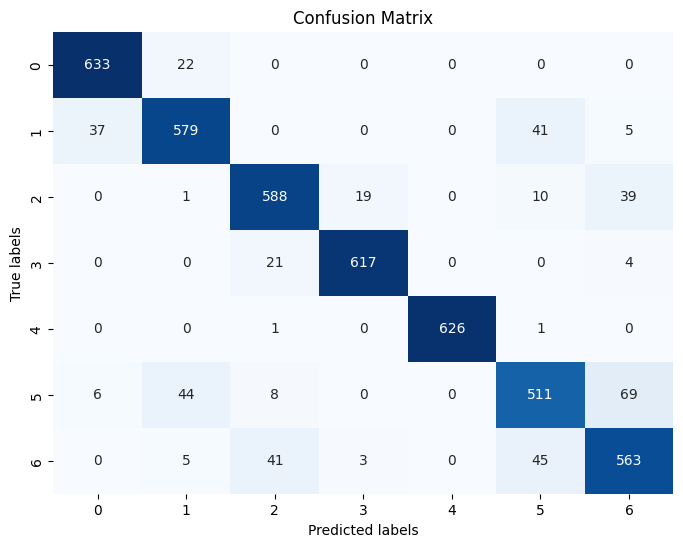

In [34]:
# Fit the VotingClassifier to the training data
votClv_model.fit(transformed_train, y_train)
# Now you can use the evaluation function
evaluate_model_2(votClv_model, X_test, y_test)